<a href="https://colab.research.google.com/github/cityardhelaalisya/Data-Analyst-Portofolio/blob/main/Retail_Store_Sales_Exploratory_Data_Analyst_and_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Retail Store Sales Exploratory Data Analysis (EDA) and Data Cleaning**

The Retail Store Sales dataset contains 11 columns and 12,575 rows.
In this project, I performed data cleaning by removing missing values and correcting the data type in the Transaction Date column before moving to analysis.

**Objectives**

The main goals of this analysis were to:

1. Analyze monthly sales revenue.

2. Identify the top-selling product category.

3. Find the top 5 customers by purchase frequent.

4. Determine the most frequently used payment method in each location.

5. Assess whether discounts influence customer purchasing behavior.

**Key Insights**

1. January 2022 recorded the highest total sales revenue.

2. Food was the best-selling product category.

3. Customer cust_05 emerged as the most loyal customer with repeated purchases.

4. Cash remained the most widely used payment method.

5. Customers showed a tendency to purchase more items when discounts were applied.

**Recommendations**

1. Ensure higher stock levels for the Food category to prevent shortages.

2. Provide special offers or vouchers for repeat customers like cust_05 to maintain loyalty.

3. Keep cash payments available, as they are still popular among customers.

4. Use targeted discounts on selected products to encourage higher sales volumes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
#load  the retail store sales dataset
sales = pd.read_csv('/content/retail_store_sales.csv')

#shows the dataset
sales.head(10)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
5,TXN_7482416,CUST_09,Patisserie,NaN,NaN,10.0,200.0,Credit Card,Online,2023-11-30,NaN
6,TXN_3652209,CUST_07,Food,Item_1_FOOD,5.0,8.0,40.0,Credit Card,In-store,2023-06-10,True
7,TXN_1372952,CUST_21,Furniture,NaN,33.5,NaN,NaN,Digital Wallet,In-store,2024-04-02,True
8,TXN_9728486,CUST_23,Furniture,Item_16_FUR,27.5,1.0,27.5,Credit Card,In-store,2023-04-26,False
9,TXN_2722661,CUST_25,Butchers,Item_22_BUT,36.5,3.0,109.5,Cash,Online,2024-03-14,False


In [ ]:
#info dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [ ]:
#check null values
missing_val = sales.isnull().sum()[sales.isnull().sum() > 0]
df_missing_val = pd.DataFrame({'NaN Counts': missing_val,
                               'NaN Percentages' : missing_val/len(sales) * 100,
                               'Data Type' : sales.dtypes}).sort_values(by='NaN Percentages', ascending=False)


df_missing_val
# There are 4 columns with null values. there are 'Discount Applied', 'Item', 'Price Per Unit', 'Quantity', 'Total Spent'
# For that columns, there is no column with NaN percentages above 90%. So we don't need to drop the column and fill null values with mod if data types = category and median or mean if data types = int/float

,NaN Counts,NaN Percentages,Data Type
Discount Applied,4199.0,33.391650,object
Item,1213.0,9.646123,object
Price Per Unit,609.0,4.842942,float64
Quantity,604.0,4.803181,float64
Total Spent,604.0,4.803181,float64
Category,NaN,NaN,object
Customer ID,NaN,NaN,object
Location,NaN,NaN,object
Payment Method,NaN,NaN,object
Transaction Date,NaN,NaN,object


In [ ]:
# change data types 'Transaction Date' to datetime
sales['Transaction Date'] = pd.to_datetime(sales['Transaction Date'], yearfirst=True)
sales['Month'] = sales['Transaction Date'].dt.month.astype('int')
sales['Year'] = sales['Transaction Date'].dt.year.astype('int')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              11362 non-null  object        
 4   Price Per Unit    11966 non-null  float64       
 5   Quantity          11971 non-null  float64       
 6   Total Spent       11971 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  8376 non-null   object        
 11  Month             12575 non-null  int64         
 12  Year              12575 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.2+ MB


In [ ]:
#check duplicates
sales.duplicated().sum()

np.int64(0)

In [ ]:
# check datas in Discount Applied
sales['Discount Applied'].unique()

# fill null values with mode
sales['Discount Applied'] = sales['Discount Applied'].fillna('Unknown')
# column discount applied has successfully filled null value with 'Unknown'

In [ ]:
# check datas in column Item
sales['Item'].unique()

# fill null values with mode values = 'Unknown'
sales['Item'] = sales['Item'].fillna('Unkown')

In [ ]:
# because price per unit, quantity and total spent are numerice data types. I want to check whether we can fillna with calculate each other
sales[(sales['Price Per Unit'].isna()) & (sales['Quantity'].notna()) & (sales['Total Spent'].notna())][['Price Per Unit', 'Quantity', 'Total Spent']]

# we can calculate and fill na values in Price per Unit with Total Spent / Quantity
cal_price = sales['Total Spent'] / sales['Quantity']
sales['Price Per Unit'] = sales['Price Per Unit'].fillna(cal_price)
sales['Price Per Unit'].isna().sum()

# check Quantity and Total Spent column
sales[(sales['Price Per Unit'].notna()) & (sales['Quantity'].isna()) & (sales['Total Spent'].notna())][['Price Per Unit', 'Quantity', 'Total Spent']]
sales[(sales['Price Per Unit'].notna()) & (sales['Quantity'].isna()) & (sales['Total Spent'].isna())][['Price Per Unit', 'Quantity', 'Total Spent']]

# we can't use fillna values with calculate 'Price Per Unit' and 'Total Spent'. So we need fill it with median or median use bloxplot
sales.describe()

,Price Per Unit,Quantity,Total Spent,Transaction Date,Month,Year
count,12575.000000,11971.000000,11971.000000,12575,12575.000000,12575.000000
mean,23.369304,5.536380,129.652577,2023-07-12 20:23:41.105368064,6.366441,2023.042386
min,5.000000,1.000000,5.000000,2022-01-01 00:00:00,1.000000,2022.000000
25%,14.000000,3.000000,51.000000,2022-09-30 00:00:00,3.000000,2022.000000
50%,23.000000,6.000000,108.500000,2023-07-13 00:00:00,6.000000,2023.000000
75%,33.500000,8.000000,192.000000,2024-04-24 00:00:00,9.000000,2024.000000
max,41.000000,10.000000,410.000000,2025-01-18 00:00:00,12.000000,2025.000000
std,10.748728,2.857883,94.750697,NaN,3.503156,0.855581


In [ ]:
# fill na values for 'Quantity' with mean and 'Total Spent' with median
sales['Quantity'] = sales['Quantity'].fillna(sales['Quantity'].mean())
sales['Total Spent'] = sales['Total Spent'].fillna(sales['Total Spent'].median())

sales.isna().sum()

,0
Transaction ID,0
Customer ID,0
Category,0
Item,0
Price Per Unit,0
Quantity,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,0


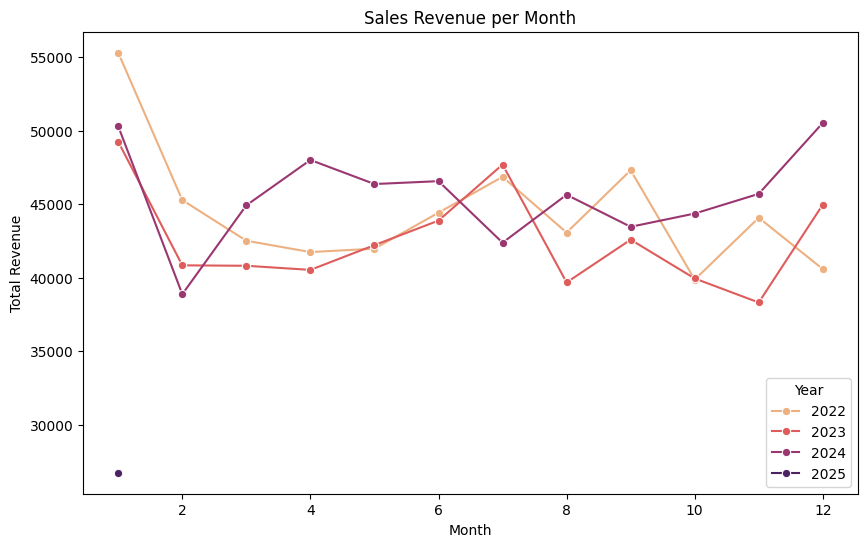

In [ ]:
# EXPLORATORY DATA ANALYST
# 1. Sales Revenue Per Month

sales_revenue_month = sales.groupby(['Year', 'Month'])['Total Spent'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_revenue_month, x='Month', y='Total Spent', hue='Year', marker='o', palette='flare')
plt.title('Sales Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

/tmp/ipython-input-1280066083.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_buy_item_category, x='Category', y='Quantity', palette = 'rocket')


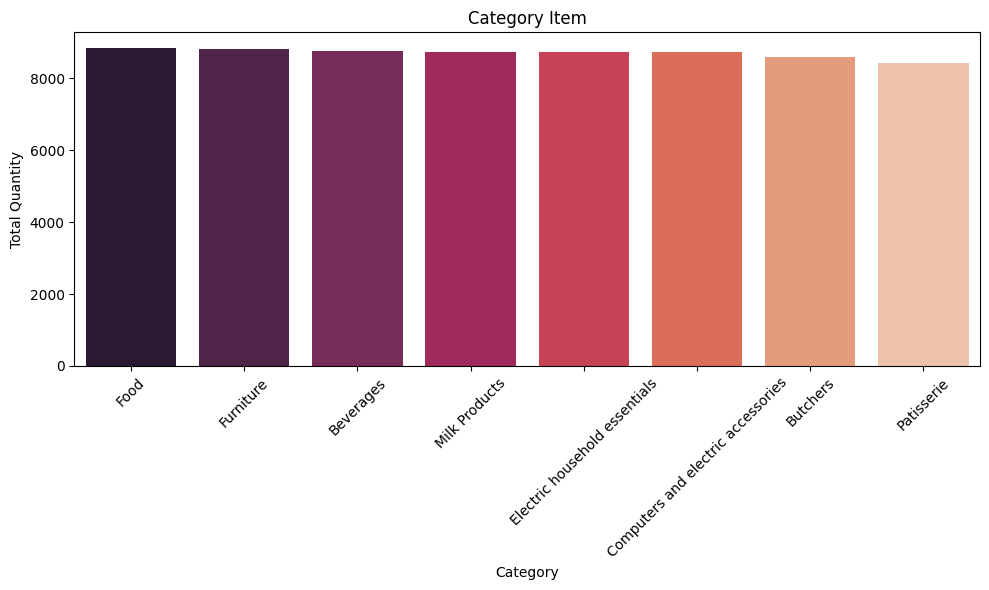

In [ ]:
# Which Category Item Sold The Most
most_buy_item_category = sales.groupby('Category')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=most_buy_item_category, x='Category', y='Quantity', palette = 'rocket')
plt.title('Category Item')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Total Quantity')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3998512287.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customer, x='Transaction ID', y='Customer ID', palette='magma')


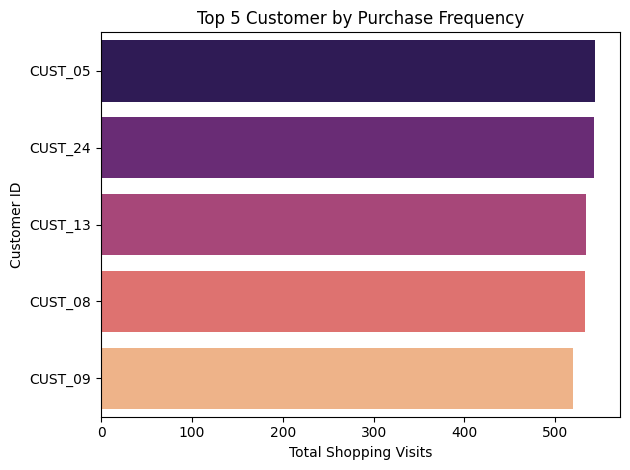

In [ ]:
# 3. Top 5 Customer by purchase frequency

top_customer = sales.groupby('Customer ID')['Transaction ID'].count().reset_index().sort_values(by='Transaction ID', ascending=False).head(5)
sns.barplot(data=top_customer, x='Transaction ID', y='Customer ID', palette='magma')
plt.title('Top 5 Customer by Purchase Frequency')
plt.xlabel('Total Shopping Visits')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()

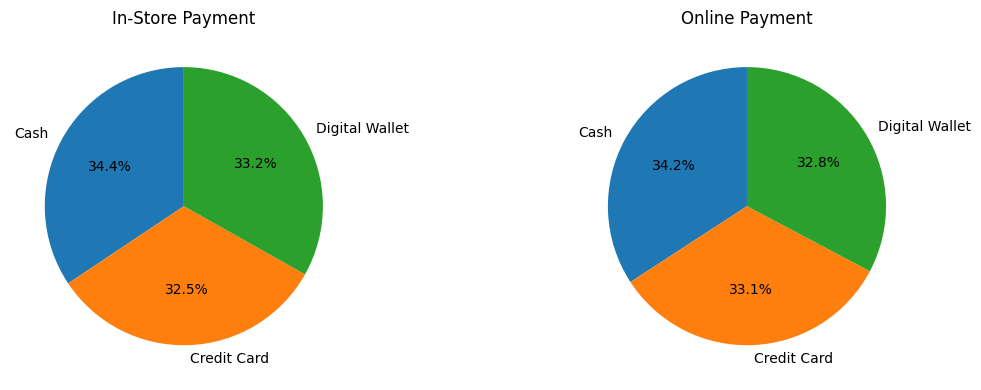

In [ ]:
# 4. What kind of Payment method do customers use the most in each location?

customer_payment = sales.groupby(['Location', 'Payment Method'])['Customer ID'].count().reset_index()
instore = customer_payment[customer_payment['Location'] == 'In-store']
online = customer_payment[customer_payment['Location'] == 'Online']

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].pie(instore['Customer ID'], labels=instore['Payment Method'], autopct='%.1f%%', startangle=90)
ax[0].set_title('In-Store Payment')

ax[1].pie(online['Customer ID'], labels=online['Payment Method'], autopct='%.1f%%', startangle=90)
ax[1].set_title('Online Payment')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2475247612.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Discount Applied', y='Quantity', data=median_qty, palette='magma')


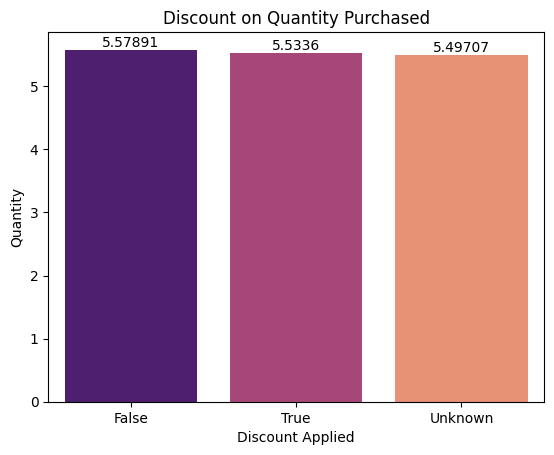

In [ ]:
# If a discount is applied, do customers tend to buy more?

median_qty = sales.groupby('Discount Applied')['Quantity'].mean().reset_index().sort_values(by='Quantity', ascending=False)
ax = sns.barplot(x='Discount Applied', y='Quantity', data=median_qty, palette='magma')
plt.title('Discount on Quantity Purchased')
for container in ax.containers:
    ax.bar_label(container)
plt.show()
